In [2]:
import pandas as pd
from pandas import datetime # packages for strptime
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6  
import numpy as np
import seaborn as sns
from numpy import arange
from datetime import datetime

/Users/chih-yaosun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
#2020-01-22
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

df_china = pd.read_csv('df_china_02272020.csv',index_col=0, parse_dates=[0], date_parser=parser)

In [4]:
df_china

,Country.Region,confirmednew,deathsnew,recoverednew
Last.Update,,,,
2020-01-22,China,547,17,28
2020-01-23,China,639,18,30
2020-01-24,China,916,26,36
2020-01-25,China,1399,42,39
2020-01-26,China,2062,56,49
2020-01-27,China,2863,82,58
2020-01-28,China,5494,131,101
2020-01-29,China,6070,133,120
2020-01-30,China,8124,171,135


In [4]:
# check the type of the date-data 
df_china.dtypes

Country.Region    object
confirmednew       int64
deathsnew          int64
recoverednew       int64
dtype: object

# prediction on China 

In [5]:
df_china_conformed = df_china.drop(['Country.Region', 'deathsnew', 'recoverednew'], axis=1)

In [6]:
df_china_conformed # total 34 rows

,confirmednew
Last.Update,
2020-01-22,547
2020-01-23,639
2020-01-24,916
2020-01-25,1399
2020-01-26,2062
2020-01-27,2863
2020-01-28,5494
2020-01-29,6070
2020-01-30,8124


In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

In [8]:
from matplotlib import pyplot as plt

#plt.savefig('foo.png')
#plt.savefig('foo.pdf')

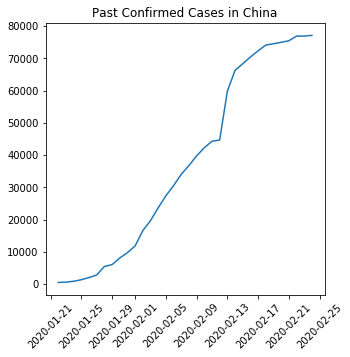

In [9]:
# plot the confirmed case in China
a = plt.plot(df_china_conformed) 
plt.xticks(rotation=45)
plt.title("Past Confirmed Cases in China")
plt.savefig('a.png')

# Test to see if the data is stationary 

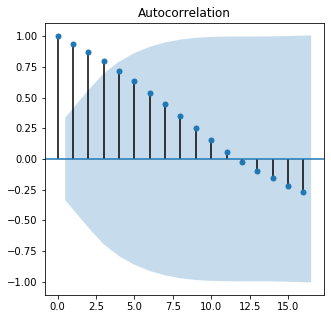

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

b = plot_acf(df_china_conformed)
plt.savefig('b.png')

In [11]:
# turn data into stationary 
df_china_conformed_diff = df_china_conformed.diff(periods=1) 
                                    # integrated of order 1 -> 1 lag, 1 shift
                                    # denoted by 'd' - for differences
                                    # one of the parameter of ARIMA 
 
df_china_conformed_diff.dropna(inplace=True)
df_china_conformed_diff.head(2)

,confirmednew
Last.Update,
2020-01-23,92.0
2020-01-24,277.0


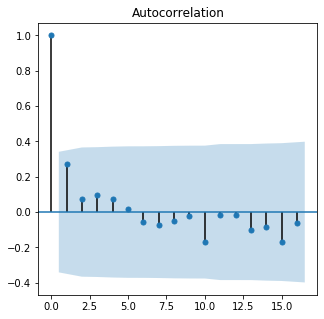

In [12]:
# graph show that dataset has turned into stationary 
c = plot_acf(df_china_conformed_diff)
plt.savefig('c.png')

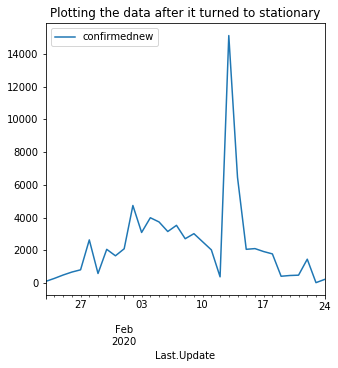

In [13]:
d = df_china_conformed_diff.plot()
plt.title("Plotting the data after it turned to stationary")
plt.savefig('d.png')

# Spliting the data into training and testing 

In [14]:
x = df_china_conformed.values
x.size
train = x[0:25] # 25 as training data
test = x[25:] # 9 as testing data
predictions = []

# Simple AR model - nonStationary & non-random

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/chih-yaosun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, 

In [16]:
# size of prediction should be the same as testing data - here it is 9
predictions = model_ar_fit.predict(start=25, end=34)

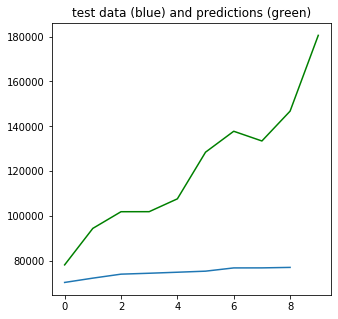

In [17]:
e = plt.plot(test) # actual data
plt.plot(predictions, color = 'green')
plt.title("test data (blue) and predictions (green)")
plt.savefig('e.png')

### Test data is mild comparing to prediction
### Fix this by randomly select training and testing data

In [19]:
from sklearn.model_selection import train_test_split

X = df_china_conformed.values # turn data into array 

# split data into training and test data.
train_X, test_X = train_test_split(X,train_size=0.60, test_size=0.40, random_state=123)

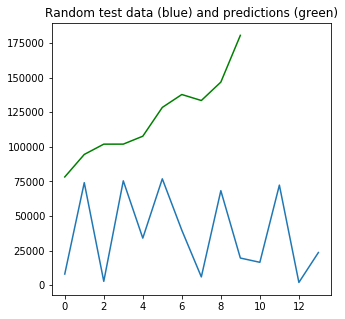

In [21]:
i = plt.plot(test_X) # actual data
plt.plot(predictions, color = 'green')
plt.title("Random test data (blue) and predictions (green)")
plt.savefig('i.png')

In [137]:
import datetime

In [138]:
date = datetime.datetime(2020,2,24)
for i in range(365): 
    for x in range(len(predictions)): 
        date += datetime.timedelta(days=1)
        print (date, round(predictions[x]),file=open("AR_02282020_output_China.txt", "a"))

In [151]:
AR_China_confirmed=pd.read_table("AR_02282020_output_China.txt", delim_whitespace=True,header=None)

In [152]:
del AR_China_confirmed[1]

In [153]:
AR_China_confirmed = AR_China_confirmed.rename(columns={0: 'Date', 2:'Forecast_Confirmed_AR'})

In [160]:
AR_China_confirmed = AR_China_confirmed[0:312]

In [162]:
AR_China_confirmed

,Date,Forecast_Confirmed_AR
0,2020-02-25,74111.0
1,2020-02-26,80099.0
2,2020-02-27,86310.0
3,2020-02-28,92744.0
4,2020-02-29,99402.0
...,...,...
307,2020-12-28,12410411.0
308,2020-12-29,12485013.0
309,2020-12-30,12559840.0
310,2020-12-31,12634889.0


 # ARIMA model 

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# non Random

In [23]:
# p,d,Q 
# p is period taking from the model
# d differenciate 
# Q period in moving average model 
model_arima = ARIMA(train,order =(0, 2, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) # the lower the better 

436.3751669007407


# Random 

In [41]:
# using random split to see if it works better 
#train_X, test_X
# it does not work better 

model_arima_Ramdom = ARIMA(train_X,order =(0, 2, 3))
model_arima_Ramdom_fit = model_arima_Ramdom.fit()
print(model_arima_Ramdom_fit.aic)

438.28955672108015


/Users/chih-yaosun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Simple function that finds the least AIC number using p-d-q parameter

In [5]:
import warnings
warnings.filterwarnings('ignore')
import itertools
p=d=q=range(0,6)
pdq = list(itertools.product(p,d,q))

for parameter in pdq:
    try:
        model_arima1 = ARIMA(train_X,order =parameter)
        model_arima1_fit = model_arima1.fit()
        print(parameter, model_arima1_fit.aic)
    except:
        continue

# non Random

In [60]:
predictions_nonRandom = model_arima_fit.forecast(steps=9)[0] # steps here should match the size of testing data
predictions_nonRandom

array([ 74111.00986335,  80098.5221725 ,  86309.53692744,  92744.05412819,
        99402.07377473, 106283.59586707, 113388.62040521, 120717.14738915,
       128269.17681889])

# random 

In [67]:
predictions_random = model_arima_Ramdom_fit.forecast(steps=9)[0]
predictions_random

array([ 78956.38400354,  69304.16881728,  77267.21226772,  85606.07093698,
        94320.74482508, 103411.23393201, 112877.53825777, 122719.65780236,
       132937.59256578])

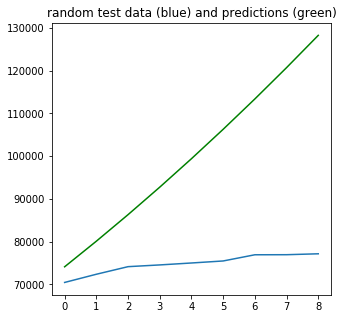

In [68]:
f = plt.plot(test) # actual data
plt.plot(predictions_nonRandom, color = 'green')
plt.title("random test data (blue) and predictions (green)")
plt.savefig("f.png")

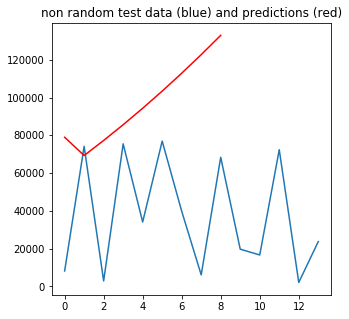

In [69]:
g =plt.plot(test_X) # actual data
plt.plot(predictions_random, color = 'red')
plt.title("non random test data (blue) and predictions (red)")
plt.savefig('g.png')

## writing the result into txt files

### wrirting non-random file

In [64]:
import datetime

In [65]:
## the following to print results
predictions = model_arima_fit.forecast(steps=365)[0]
date = datetime.datetime(2020,2,24)
for i in range(365): 
    for x in range(len(predictions)): 
        date += datetime.timedelta(days=1)
        print (date, round(predictions[x]),file=open("02282020_output_China.txt", "a"))

In [140]:
#predictions

### writing random split dataset 

In [70]:
#model_arima1_fit
predictions_Ran_fit = model_arima_Ramdom_fit.forecast(steps=365)[0]
date = datetime.datetime(2020,2,24)
for i in range(365): 
    for x in range(len(predictions_Ran_fit)): 
        date += datetime.timedelta(days=1)
        print (date, round(predictions_Ran_fit[x]),file=open("ran_002282020_output_China.txt", "a"))

## loading the txt file into dataframe

## non-random dataset 

In [106]:
frct_China_confirmed=pd.read_table("02282020_output_China.txt", delim_whitespace=True,header=None)

In [107]:
del frct_China_confirmed[1]

In [108]:
frct_China_confirmed = frct_China_confirmed[0:312]

In [109]:
frct_China_confirmed = frct_China_confirmed.rename(columns={0: 'Date', 2:'Forecast_Confirmed'})

In [110]:
frct_China_confirmed['Forecast_Confirmed']=frct_China_confirmed['Forecast_Confirmed'].round(0).astype(int)

In [112]:
frct_China_confirmed

,Date,Forecast_Confirmed
0,2020-02-25,74111
1,2020-02-26,80099


In [82]:
# print non-random prediction 
print(frct_China_confirmed.to_string(),
      file=open("non_ran_002282020.txt", "a"))

# Change datetime to datetime format

In [113]:
frct_China_confirmed['Date'] =  pd.to_datetime(frct_China_confirmed['Date'], format='%Y-%m-%d')

In [114]:
frct_China_confirmed.head(2)

,Date,Forecast_Confirmed
0,2020-02-25,74111
1,2020-02-26,80099


In [115]:
from datetime import date
from datetime import time
from datetime import datetime

# prepare for date to plot

In [116]:
confirmPlot = frct_China_confirmed.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
confirmPlot.index = confirmPlot.index.strftime('%B')

In [117]:
confirmPlot

,Forecast_Confirmed
Date,
February,432666
March,7603273
April,19926076
May,40057812
June,63808484
July,98293585
August,137768963
September,177182101
October,234887904


# ***************************

## random dataset

In [118]:
frct_China_confirmed_random=pd.read_table("ran_002282020_output_China.txt", delim_whitespace=True,header=None)

In [119]:
del frct_China_confirmed_random[1]

In [120]:
frct_China_confirmed_random = frct_China_confirmed_random[0:312]

In [121]:
frct_China_confirmed_random = frct_China_confirmed_random.rename(columns={0: 'Date', 2:'Forecast_Confirmed'})

In [123]:
frct_China_confirmed_random[:2]

,Date,Forecast_Confirmed
0,2020-02-25,49009.0
1,2020-02-26,71835.0


In [124]:
print(frct_China_confirmed_random.to_string(),
      file=open("ran_002282020.txt", "a"))

In [125]:
# convert float to int 
frct_China_confirmed_random['Forecast_Confirmed']=frct_China_confirmed_random['Forecast_Confirmed'].round(0).astype(int)

In [126]:
frct_China_confirmed_random.dtypes

Date                  object
Forecast_Confirmed     int64
dtype: object

# Change datetime to datetime format

In [129]:
frct_China_confirmed_random['Date'] =  pd.to_datetime(frct_China_confirmed_random['Date'], format='%Y-%m-%d')

In [130]:
confirmPlot_random = frct_China_confirmed_random.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
confirmPlot_random.index = confirmPlot_random.index.strftime('%B')

# Ploting 

In [163]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

# non-random

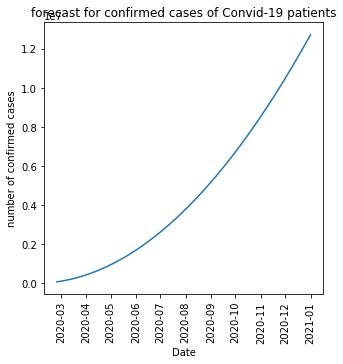

<Figure size 360x360 with 0 Axes>

In [164]:
x = frct_China_confirmed['Date']
y = frct_China_confirmed['Forecast_Confirmed']
h = plt.plot(x, y)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('number of confirmed cases')
plt.title("forecast for confirmed cases of Convid-19 patients")
plt.show()
plt.savefig('h.png')

# random 

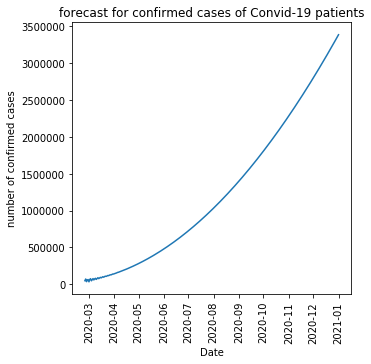

In [165]:
x = frct_China_confirmed_random['Date']
y = frct_China_confirmed_random['Forecast_Confirmed']
plt.plot(x, y)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('number of confirmed cases')
plt.title("forecast for confirmed cases of Convid-19 patients")
plt.show()